In [1]:
import pandas as pd

playoffs_df = pd.read_csv('cleaned_playoffs.csv')

## How often did the team with home court advantage win?

In [2]:
num_home_team_wins = playoffs_df[playoffs_df['WinningTeam'] == 1].shape[0]

num_series = playoffs_df.shape[0]

num_home_team_wins / num_series

0.7348586810228802

### The team with home court advantage won 73.5% of the time

## The first round is notoroius for being an easy round for the top 4 seeds, lets redo the above question excluding round 1.

In [3]:
is_round1 = (playoffs_df['Round'] == 'Round 1')  
no_round1_df = playoffs_df.drop(playoffs_df[is_round1].index)

In [4]:
num_home_team_wins = no_round1_df[no_round1_df['WinningTeam'] == 1].shape[0]

num_series = no_round1_df.shape[0]

num_home_team_wins / num_series

0.7161125319693095

### Surprisingly, there isnt that much of a drop off after round 1, with the home team winning 71.6% of the time.

## Let's see how often the home court team won during each round.

In [5]:
home_team_wins_df = playoffs_df[playoffs_df['WinningTeam'] == 1]


results = home_team_wins_df.groupby(['Round'])['WinningTeam'].count() /  \
            playoffs_df.groupby(['Round'])['WinningTeam'].count()


In [6]:
results.sort_values(ascending=False)

Round
Conf Semis     0.767857
Round 1        0.755682
NBA Finals     0.690909
Conf Finals    0.630631
Name: WinningTeam, dtype: float64

<AxesSubplot: xlabel='Round'>

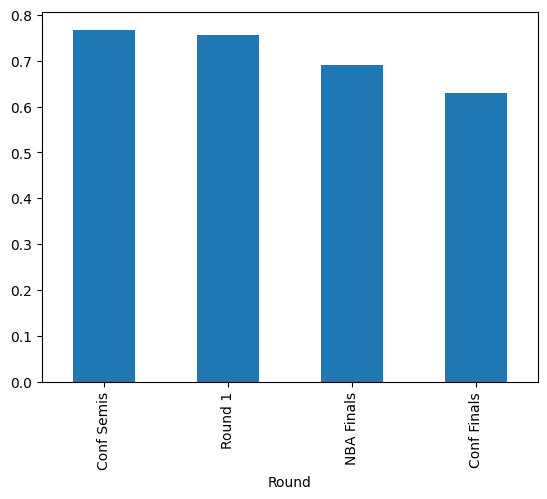

In [18]:
results.sort_values(ascending=False).plot.bar()

### In the Conference Semifinals home court advantage matters the most, with the home court team winning 76.8% of the time

### In the Conference Finals home court advantage matters the least, with the home court team winning 63.1% of the time

## How often did the favorites actually win?

In [7]:
to_drop = (playoffs_df['Odds1'].isnull() | playoffs_df['Odds2'].isnull())
with_odds_df = playoffs_df.drop(playoffs_df[to_drop].index)

In [8]:

num_series = with_odds_df.shape[0]


favorites_win1_filter = (with_odds_df['WinningTeam'] == 1) & (with_odds_df['Odds1'] < 0)
favorites_win2_filter = (with_odds_df['WinningTeam'] == 2) & (with_odds_df['Odds2'] < 0)

favorites_win_filter = favorites_win1_filter | favorites_win2_filter

favorites_win_df = with_odds_df[favorites_win_filter]


favorites_win_df.shape[0] / num_series

0.7604166666666666

### The team favored to win wins 76% of the time

In [9]:
underdogs_win_df = with_odds_df[~favorites_win_filter]

underdogs_win_df.shape[0] / num_series


0.23958333333333334

### While the underdogs win 24% of the time. 

## What seed were the NBA champions historically?

In [10]:
finals_df = playoffs_df[playoffs_df['Round'] == 'NBA Finals']

In [12]:
champs1_df = finals_df[finals_df['WinningTeam'] == 1]
champs2_df = finals_df[finals_df['WinningTeam'] == 2]

In [14]:
vc1 = champs1_df['Seed1'].value_counts()
vc2 = champs2_df['Seed2'].value_counts()


champ_seed_count = vc1.combine(vc2, lambda x, y: x + y, fill_value=0)
champ_seed_count

1    35
2    10
3     9
6     1
dtype: int64

<AxesSubplot: >

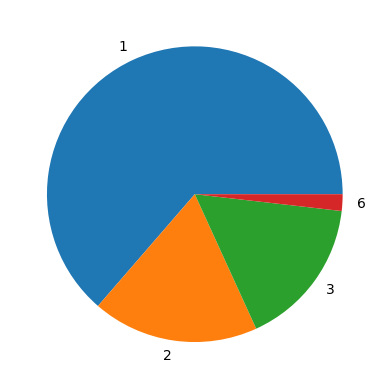

In [15]:
champ_seed_count.plot.pie()

In [16]:
champ_seed_count / champ_seed_count.sum()

1    0.636364
2    0.181818
3    0.163636
6    0.018182
dtype: float64

### Historically speaking, the 1st seed in their conference has gone on to win the title 64% of the time.


### The 2nd seed in their conference has won it all 18% of the time.


### The 3rd seed in their conference has won it all 16% of the time.


### Only once in NBA history has the 6th seed won the championship.

## What was the average length of a series during each round?

In [ ]:
# In the years before 2003, round 1 was not a best of 7
# We shall drop these series

bo7_filter = ~((playoffs_df['Year'] < 2003) & (playoffs_df['Round'] == 'Round 1'))

bo7_df = playoffs_df[bo7_filter]

In [24]:
bo7_df.groupby('Round')['SeriesLength'].mean()

Round
Conf Finals    5.675676
Conf Semis     5.696429
NBA Finals     5.690909
Round 1        5.470238
Name: SeriesLength, dtype: float64

### All rounds expect to go either 5 or 6 games, even the first round where pairings are more lopsided

[Text(0.5, 0, 'Length of Series')]

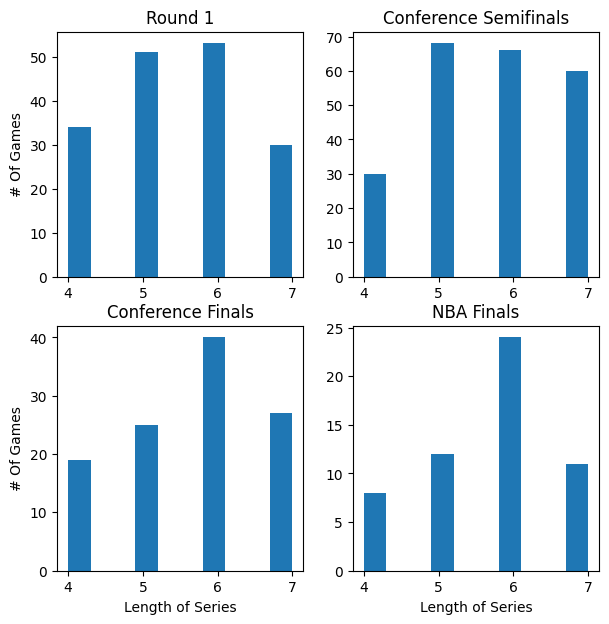

In [52]:
from matplotlib import pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(7,7))


axs[0,0].hist(bo7_df[bo7_df['Round'] == 'Round 1']['SeriesLength'] )
axs[0,0].set_title('Round 1')
axs[0,0].set( ylabel='# Of Games')


axs[0,1].hist(bo7_df[bo7_df['Round'] == 'Conf Semis']['SeriesLength'] )
axs[0,1].set_title('Conference Semifinals')


axs[1,0].hist(bo7_df[bo7_df['Round'] == 'Conf Finals']['SeriesLength'] )
axs[1,0].set_title('Conference Finals')
axs[1,0].set(xlabel="Length of Series", ylabel='# Of Games')

axs[1,1].hist(bo7_df[bo7_df['Round'] == 'NBA Finals']['SeriesLength'] )
axs[1,1].set_title('NBA Finals')
axs[1,1].set(xlabel="Length of Series")




### A series is more likely to end in 6 games in the Conference Finals or NBA Finals than in Round 1 or the Conference Semifinals

## Are odds correlated with the length of the series, i.e.: is it the case that the bigger the underdog, the shorter the series?

In [57]:
# Drop rows with null values in Odds1 or Odds2 column

odds_filter = (bo7_df['Odds1'].isnull()) | (bo7_df['Odds2'].isnull())


bo7_df = bo7_df[~odds_filter]

In [63]:
bo7_df['UnderdogOdds'] = bo7_df['Odds1'].combine(bo7_df['Odds2'], max) 

/tmp/ipykernel_8616/1580436440.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bo7_df['UnderdogOdds'] = bo7_df['Odds1'].combine(bo7_df['Odds2'], max)


In [75]:
bo7_df.groupby('SeriesLength')['UnderdogOdds'].mean()

SeriesLength
4.0    794.306667
5.0    574.504132
6.0    358.421053
7.0    277.533981
Name: UnderdogOdds, dtype: float64

### People are generally good at percieving which team is better before the series.

### On average the bigger the odds for the underdog, the quicker the series.